In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

clean_comment  category
0   family mormon have never tried explain them t...         1
1  buddhism has very much lot compatible with chr...         1
2  seriously don say thing first all they won get...        -1
3  what you have learned yours and only yours wha...         0
4  for your own benefit you may want read living ...         1

In [ ]:
df.shape

(37249, 2)

In [ ]:
df.sample()['clean_comment'].values

array(['murdered words'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [ ]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [ ]:
df[df['clean_comment'].isna()]

clean_comment  category
413             NaN         0
605             NaN         0
2422            NaN         0
2877            NaN         0
3307            NaN         0
...             ...       ...
35975           NaN         0
36036           NaN         0
37043           NaN         0
37111           NaN         0
37238           NaN         0

[100 rows x 2 columns]

In [ ]:
df[df['clean_comment'].isna()]['category'].value_counts()

category
0    100
Name: count, dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(350)

In [ ]:
df[df.duplicated()]

clean_comment  category
375                                                              0
392                                                              0
617                                           aurum mom          0
651                                                              0
1222                                                             0
...                                                  ...       ...
36915                                           who won          0
37044                                                            0
37125                                              hari          0
37158                                           top kek          1
37234  this part series minute videos focusing each d...         1

[350 rows x 2 columns]

In [ ]:
df[(df['clean_comment'].str.strip()=='')]

clean_comment  category
181                         0
375                         0
392                         0
651                         0
1222                        0
...             ...       ...
35711                       0
35778                       0
35987                       0
36707                       0
37044                       0

[121 rows x 2 columns]

In [ ]:
df=df[~(df['clean_comment'].str.strip()=='')]



In [ ]:
df['clean_comment']=df['clean_comment'].str.lower()

In [ ]:
df.head()

clean_comment  category
0   family mormon have never tried explain them t...         1
1  buddhism has very much lot compatible with chr...         1
2  seriously don say thing first all they won get...        -1
3  what you have learned yours and only yours wha...         0
4  for your own benefit you may want read living ...         1

In [ ]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

clean_comment  category
0       family mormon have never tried explain them t...         1
1      buddhism has very much lot compatible with chr...         1
2      seriously don say thing first all they won get...        -1
3      what you have learned yours and only yours wha...         0
4      for your own benefit you may want read living ...         1
...                                                  ...       ...
37241            let the janta decide not ulema clerics          0
37242   hona hai same with vaccination education insu...         0
37246              downvote karna tha par upvote hogaya          0
37247                                         haha nice          1
37248             facebook itself now working bjp’ cell          0

[32479 rows x 2 columns]

In [ ]:
df['clean_comment']=df['clean_comment'].str.strip()

In [ ]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))].sum()

clean_comment    0
category         0
dtype: object

In [ ]:
# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

In [ ]:
comments_with_urls

Empty DataFrame
Columns: [clean_comment, category]
Index: []

In [ ]:
# Identify comments containing new line characters
comments_with_newlines=df[df['clean_comment'].str.contains('\n')]
comments_with_newlines.head()

clean_comment  category
448   what missing jpg\nand why this brilliant edit ...         1
781   india has been ruined congress and populist sc...        -1
847   like aap for its stand corruption and making p...        -1
871   reduced trade\ndeficit stronger rupee aren the...         0
1354  amsa press conference australian maritime safe...         1

In [ ]:
comments_with_newlines.shape

(204, 2)

In [ ]:
# Remove new line characters from the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ',regex=True)


In [ ]:
# Verify the transformation by checking for any remaining new lines
comments_with_newlines_remaining=df[df['clean_comment'].str.contains('\n')]
comments_with_newlines_remaining.head()

Empty DataFrame
Columns: [clean_comment, category]
Index: []

**EDA**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='category', ylabel='count'>

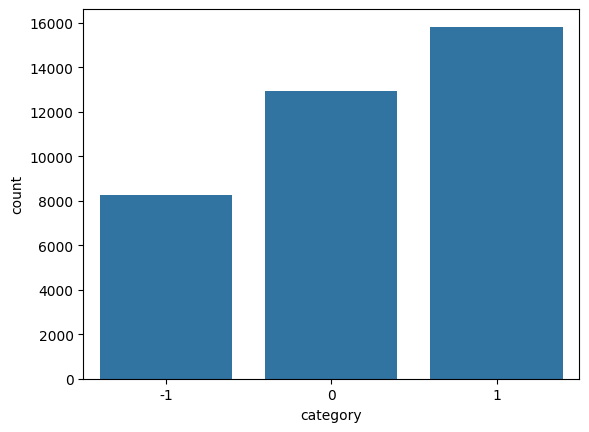

In [ ]:
# distribution of classes
sns.countplot(x='category',data=df)

In [ ]:
df['category'].value_counts(normalize=True).mul(100).round(2)

category
 1    42.75
 0    34.90
-1    22.35
Name: proportion, dtype: float64

In [ ]:
df['word_count']=df['clean_comment'].apply(lambda x: len(x.split()))

In [ ]:
df.sample(5)

clean_comment  category  word_count
15063  serious note that has illegal somehow right la...        -1           9
10385  indian you don know what you got national hero...         1          47
29339             looks like indian version bobs burgers         0           6
15211  must watch oan piece the events that happened ...         0           9
19189             dude bihari with original patna accent         1           6

In [ ]:
df['word_count'].describe()

count    37028.000000
mean        29.499919
std         56.654363
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

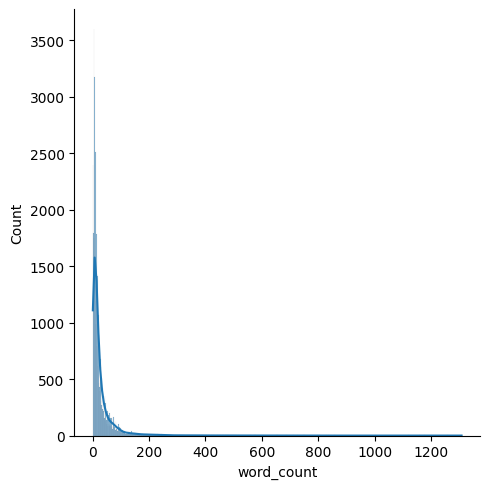

In [ ]:
sns.displot(df['word_count'],kde=True)

<Axes: ylabel='word_count'>

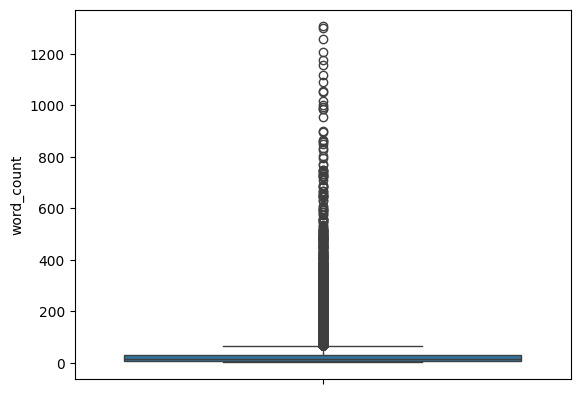

In [ ]:
sns.boxplot(df['word_count'])

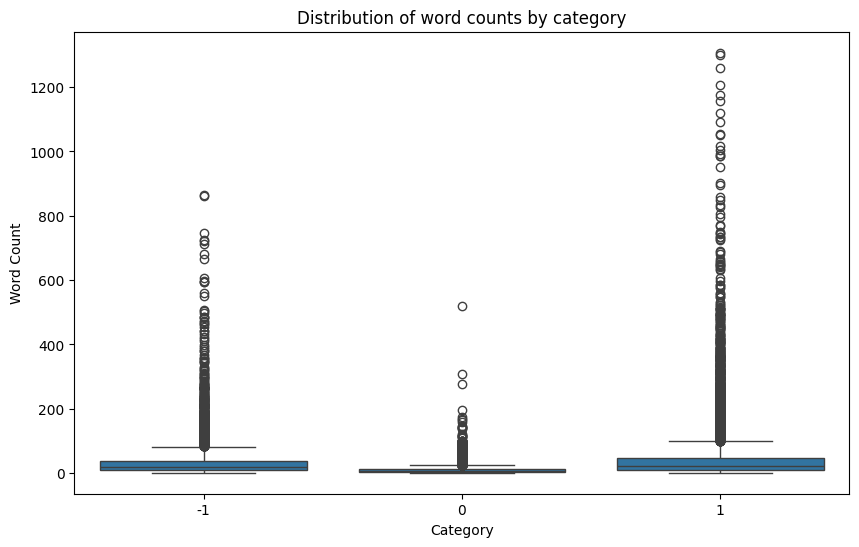

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='category',y='word_count',data=df)
plt.title('Distribution of word counts by category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

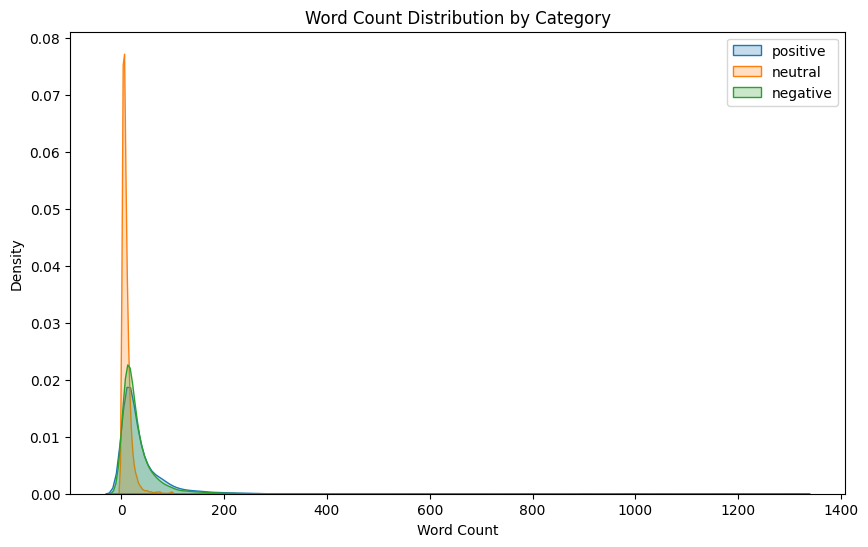

In [ ]:
plt.figure(figsize=(10,6))

sns.kdeplot(df[df['category']==1]['word_count'],label='positive',fill=True)
sns.kdeplot(df[df['category']==0]['word_count'],label='neutral',fill=True)
sns.kdeplot(df[df['category']==-1]['word_count'],label='negative',fill=True)


plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Positive comments (category 1): These tend to have a wider spread in word count, indicating that longer comments are more common in positive sentiments.

Neutral comments (category 0): The distribution shows a relatively lower frequency and is more concentrated around shorter comments compared to positive or negative ones.


Negative comments (category -1): These comments have a distribution somewhat similar to positive comments but with a smaller proportion of longer comments

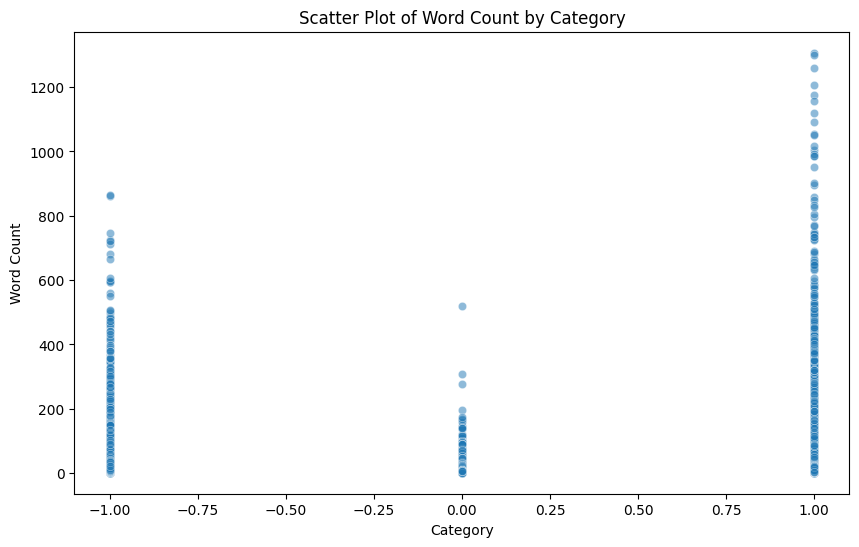

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='category',y='word_count',alpha=0.5)
plt.title('Scatter Plot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()


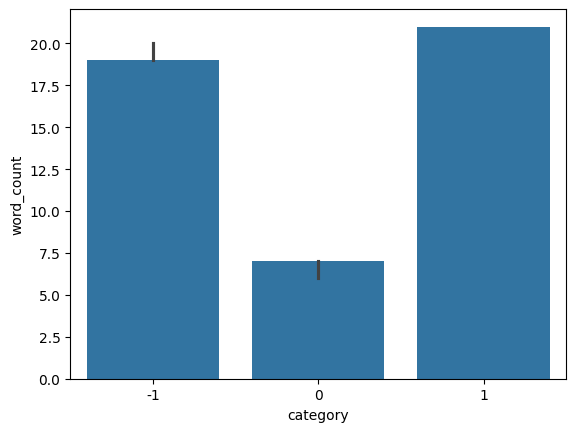

In [ ]:
sns.barplot(df,x='category',y='word_count',estimator='median')
plt.show()

In [ ]:
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

stop_words=set(stopwords.words('english'))

df['num_stop_words']=df['clean_comment'].apply(lambda x : len([word for word in x.split() if word in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


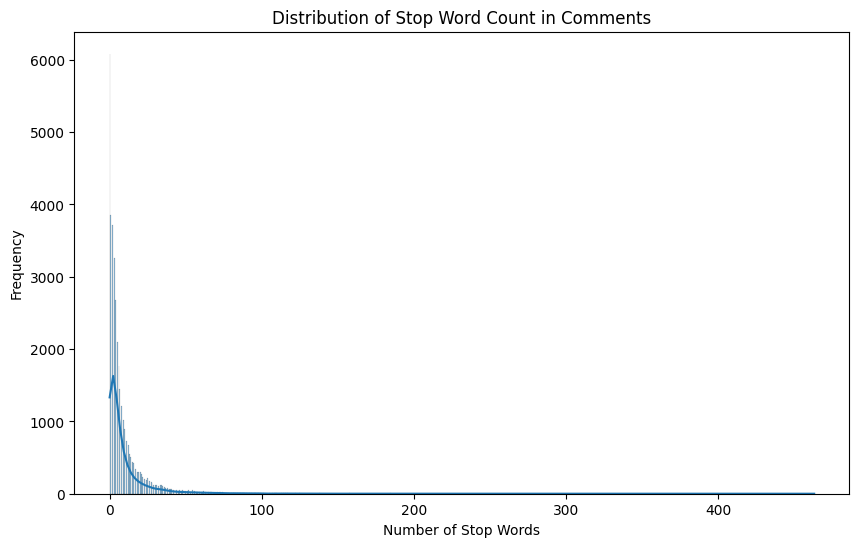

In [ ]:
# Create a distribution plot (displot) for the 'num_stop_words' column
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()

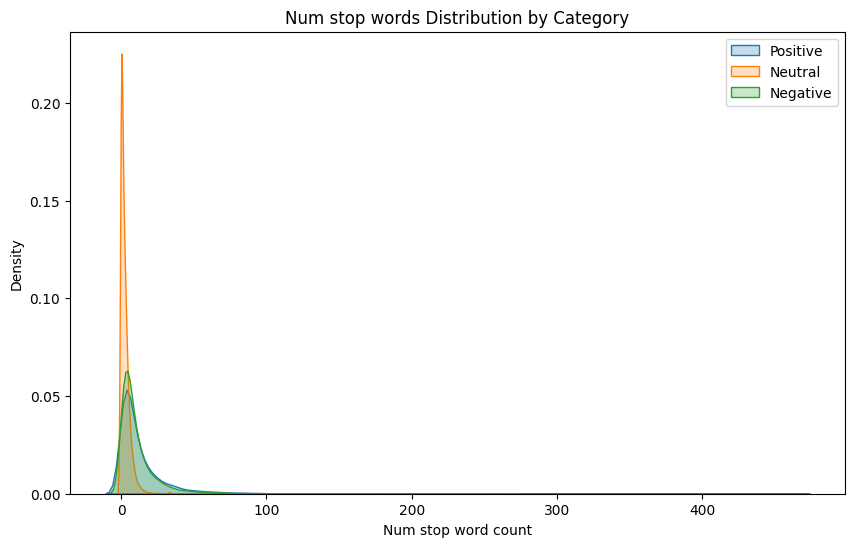

In [ ]:
plt.figure(figsize=(10,6))

sns.kdeplot(df[df["category"]==1]['num_stop_words'],label="Positive",fill=True)
sns.kdeplot(df[df["category"]==0]['num_stop_words'],label="Neutral",fill=True)
sns.kdeplot(df[df["category"]==-1]['num_stop_words'],label="Negative",fill=True)

plt.title("Num stop words Distribution by Category")
plt.xlabel("Num stop word count")
plt.ylabel('Density')

plt.legend()
plt.show()

<Axes: xlabel='category', ylabel='num_stop_words'>

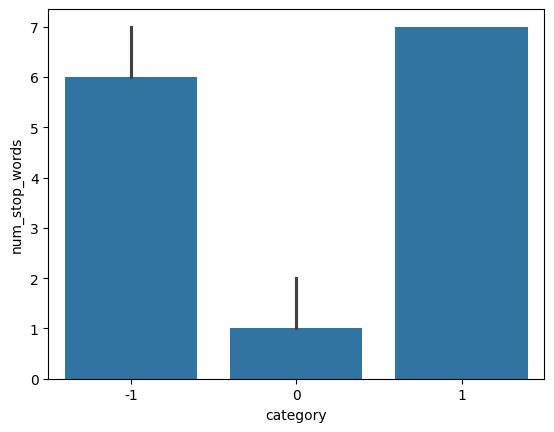

In [ ]:
sns.barplot(df,x='category',y='num_stop_words',estimator='median')

<ipython-input-121-6aa8d51b7d4e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df,x='stop_word',y='count',palette='viridis')


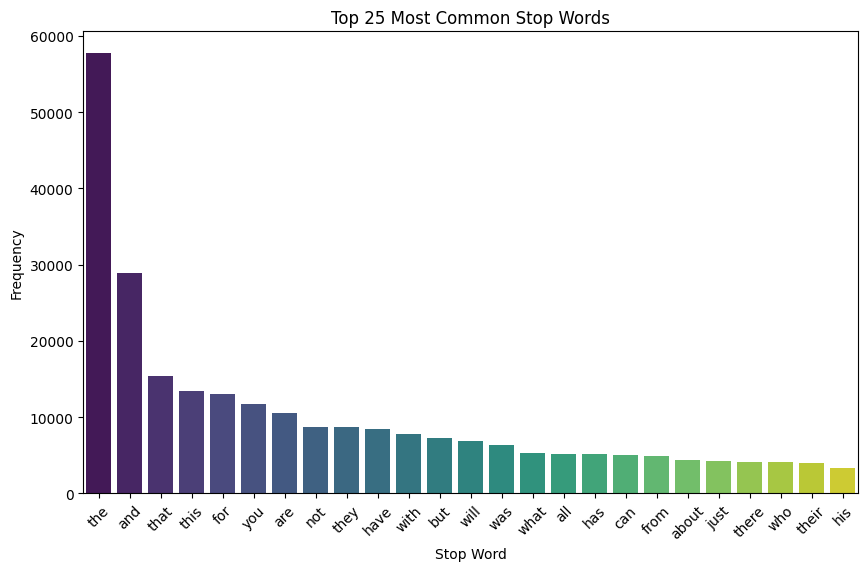

In [ ]:
from collections import Counter


all_stop_words=[word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

most_common_stop_words=Counter(all_stop_words).most_common(25)

top_25_df=pd.DataFrame(most_common_stop_words,columns=['stop_word','count'])

plt.figure(figsize=(10,6))
sns.barplot(data=top_25_df,x='stop_word',y='count',palette='viridis')
plt.xlabel('Stop Word')
plt.ylabel('Frequency')
plt.title('Top 25 Most Common Stop Words')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['num_chars']=df['clean_comment'].apply(len)

In [ ]:
df.sample(10)

clean_comment  category  \
19930  think modi has vision which very huge respect ...         1   
12738        most people are voting because bjp communal         1   
5170   thank you for the detailed analysis you happen...        -1   
24332                          thanks for sharing 南無阿彌陀佛         1   
10993  lol you acting was good good good good good go...         1   
11890  damn some cultist just typed whine here but de...         1   
26988                    rejoice series has lost the war         0   
1042   turn back now the comments this thread are abs...        -1   
19963  inb4 app privcy policy contain first time usin...         1   
8015   serious thought don these ppl have anything wo...         1   

       word_count  num_stop_words  num_chars  
19930          82              32        477  
12738           7               3         43  
5170           38              16        236  
24332           4               1         25  
10993          36               2        178  
11890          94              42        582  
26988           6               2         31  
1042           10               4         58  
19963           9               0         56  
8015           21               8        126

In [ ]:
df['num_chars'].describe()

count    37028.000000
mean       180.813303
std        358.823615
min          1.000000
25%         37.000000
50%         79.000000
75%        183.000000
max       8664.000000
Name: num_chars, dtype: float64

In [ ]:
from collections import Counter

all_text=' '.join(df['clean_comment'])

char_frequency=Counter(all_text)

char_frequency_df=pd.DataFrame(char_frequency.items(),columns=['character','frequency']).sort_values(by='frequency',ascending=True)

In [ ]:
char_frequency_df['character'].values

array(['∀', '￼', 'ಳ', ..., 't', 'e', ' '], dtype=object)

In [ ]:
char_frequency_df.tail(50)

character  frequency
66          ि        232
456         ė        280
72          ्        285
71          ो        305
67          ं        325
98          @        366
69          ी        394
60          \        476
68          े        519
57          ”        665
56          “        695
70          ा        772
38          8       1199
55          7       1291
28          6       1403
30          4       1573
54          3       1617
27          5       1631
39          9       1775
40          ’       2314
37          2       4640
32          1       4847
23          q       5141
19          z       5725
31          0       8477
15          x       9081
26          j      22924
20          k      62588
11          v      66047
0           f      78925
24          b      88246
25          w     110622
5           y     115500
21          g     133007
16          p     135226
2           m     155676
22          c     167950
18          u     170483
14          d     222132
4           l     250275
10          h     296971
8           r     331588
17          s     355521
7           o     380205
9           n     388677
3           i     401612
1           a     481442
13          t     491655
12          e     667025
6                1092360

In [ ]:
df['num_punctuation_char']=df['clean_comment'].apply(lambda x: sum([1 for char in x if char in'.,!?;:"\'()[]{}-'
]))

In [ ]:
df.head()

clean_comment  category  word_count  \
0  family mormon have never tried explain them th...         1          39   
1  buddhism has very much lot compatible with chr...         1         196   
2  seriously don say thing first all they won get...        -1          86   
3  what you have learned yours and only yours wha...         0          29   
4  for your own benefit you may want read living ...         1         112   

   num_stop_words  num_chars  num_punctuation_char  
0              13        259                     0  
1              59       1268                     0  
2              40        459                     0  
3              15        167                     0  
4              45        690                     0

In [ ]:
df['num_punctuation_char'].describe()

count    37028.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: num_punctuation_char, dtype: float64

<ipython-input-134-0a1e861f808a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


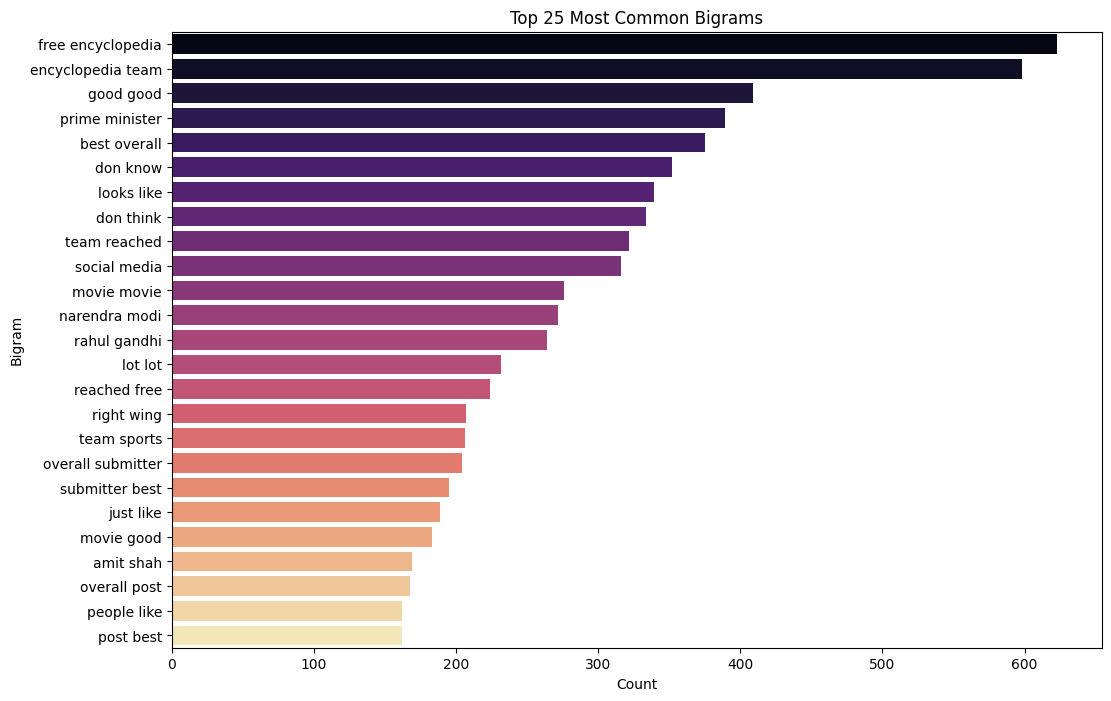

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['clean_comment'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()


<ipython-input-136-098c7efd1a63>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')


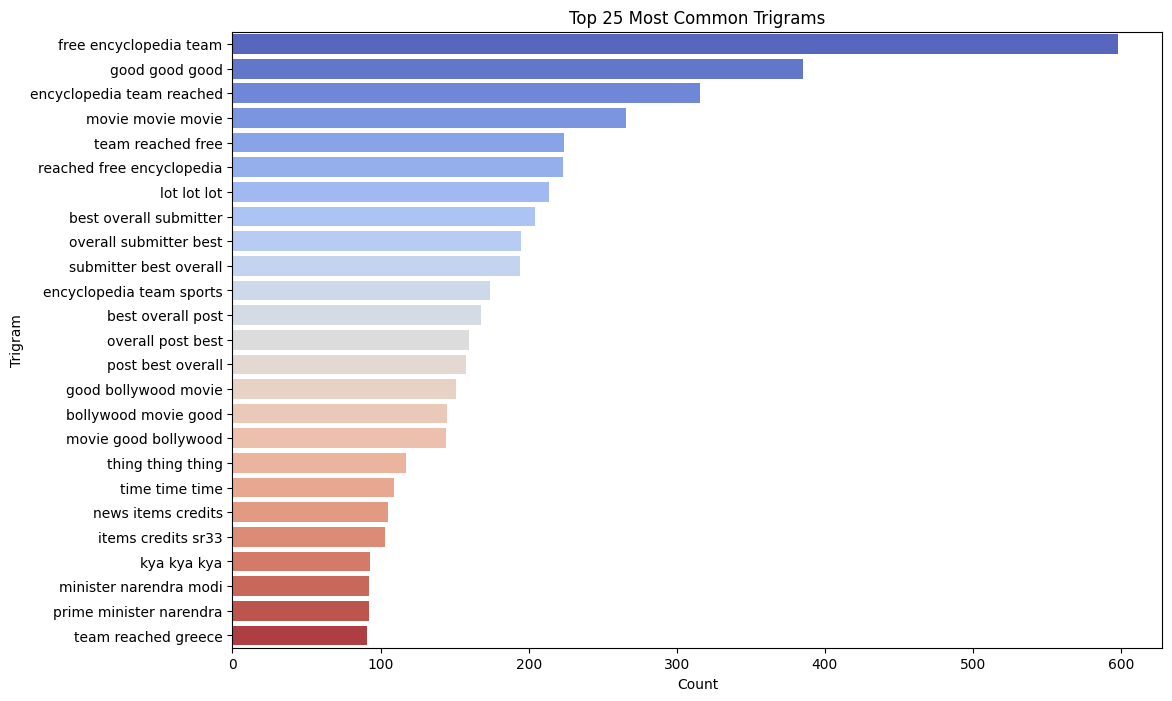

In [ ]:
# Create a function to extract the top 25 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(df['clean_comment'], 25)

# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [ ]:
import re

df['clean_comment']=df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]','',str(x)) )

In [ ]:
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

In [ ]:
df.head()

clean_comment  category  word_count  \
0  family mormon have never tried explain them th...         1          39   
1  buddhism has very much lot compatible with chr...         1         196   
2  seriously don say thing first all they won get...        -1          86   
3  what you have learned yours and only yours wha...         0          29   
4  for your own benefit you may want read living ...         1         112   

   num_stop_words  num_chars  num_punctuation_char  
0              13        259                     0  
1              59       1268                     0  
2              40        459                     0  
3              15        167                     0  
4              45        690                     0

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['category'].plot(kind='hist', bins=20, title='category')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['word_count'].plot(kind='hist', bins=20, title='word_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['num_stop_words'].plot(kind='hist', bins=20, title='num_stop_words')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('clean_comment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='category', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='category', y='word_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='word_count', y='num_stop_words', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='num_stop_words', y='num_chars', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['category']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('clean_comment')):
  _plot_series(series, series_name, i)
  fig.legend(title='clean_comment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('category')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['word_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('clean_comment')):
  _plot_series(series, series_name, i)
  fig.legend(title='clean_comment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('word_count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['num_stop_words']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('clean_comment')):
  _plot_series(series, series_name, i)
  fig.legend(title='clean_comment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('num_stop_words')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['num_chars']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('clean_comment')):
  _plot_series(series, series_name, i)
  fig.legend(title='clean_comment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('num_chars')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['category'].plot(kind='line', figsize=(8, 4), title='category')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['word_count'].plot(kind='line', figsize=(8, 4), title='word_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['num_stop_words'].plot(kind='line', figsize=(8, 4), title='num_stop_words')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['clean_comment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='clean_comment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['clean_comment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='category', y='clean_comment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['clean_comment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='word_count', y='clean_comment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['clean_comment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='num_stop_words', y='clean_comment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

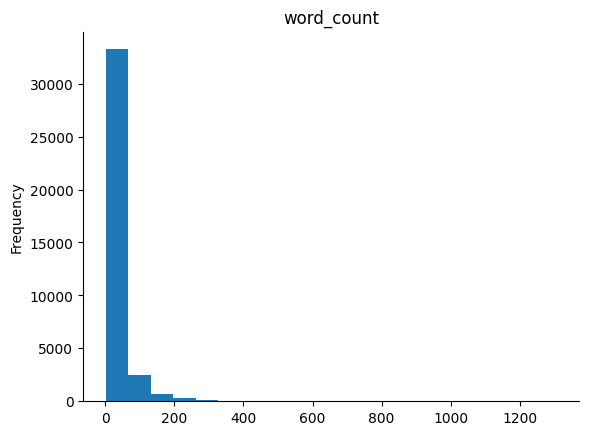

In [ ]:
from matplotlib import pyplot as plt
df['word_count'].plot(kind='hist', bins=20, title='word_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english'))-{'not',"however","no",'yet'}

df['clean_comment']=df['clean_comment'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

In [ ]:
df.head()

clean_comment  category  word_count  \
0  family mormon never tried explain still stare ...         1          39   
1  buddhism much lot compatible christianity espe...         1         196   
2  seriously say thing first get complex explain ...        -1          86   
3  learned want teach different focus goal not wr...         0          29   
4  benefit may want read living buddha living chr...         1         112   

   num_stop_words  num_chars  num_punctuation_char  
0              13        259                     0  
1              59       1268                     0  
2              40        459                     0  
3              15        167                     0  
4              45        690                     0

In [ ]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer=WordNetLemmatizer()

df['clean_comment']=df['clean_comment'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df.head()

clean_comment  category  word_count  \
0  family mormon never tried explain still stare ...         1          39   
1  buddhism much lot compatible christianity espe...         1         196   
2  seriously say thing first get complex explain ...        -1          86   
3  learned want teach different focus goal not wr...         0          29   
4  benefit may want read living buddha living chr...         1         112   

   num_stop_words  num_chars  num_punctuation_char  
0              13        259                     0  
1              59       1268                     0  
2              40        459                     0  
3              15        167                     0  
4              45        690                     0

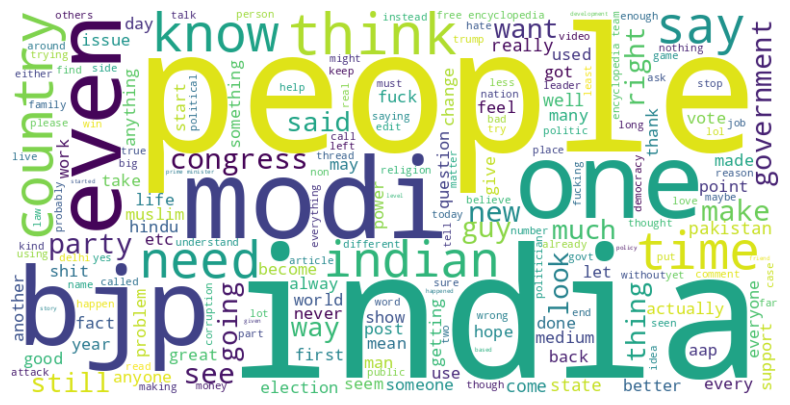

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
  wordcloud=WordCloud(width=800,height=400,background_color='white').generate(' '.join(text))
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

plot_word_cloud(df['clean_comment'])

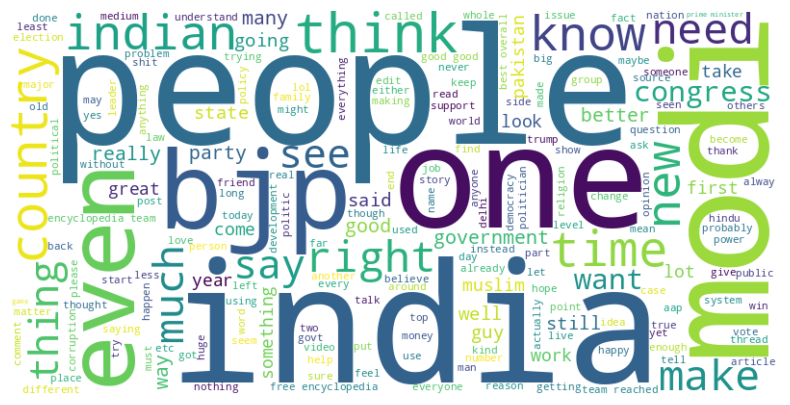

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 1]['clean_comment'])

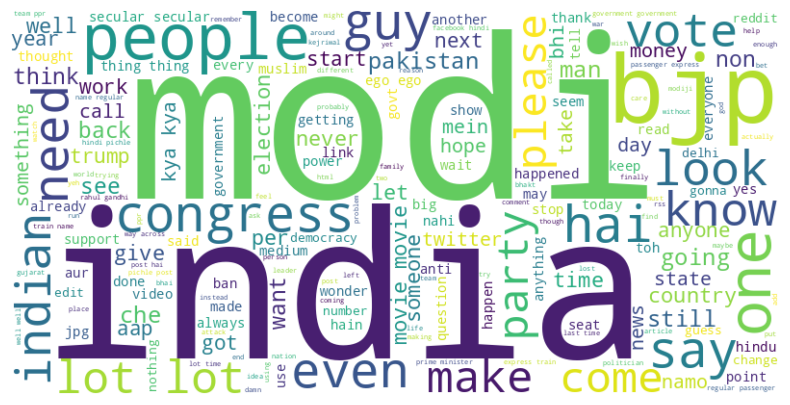

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 0]['clean_comment'])

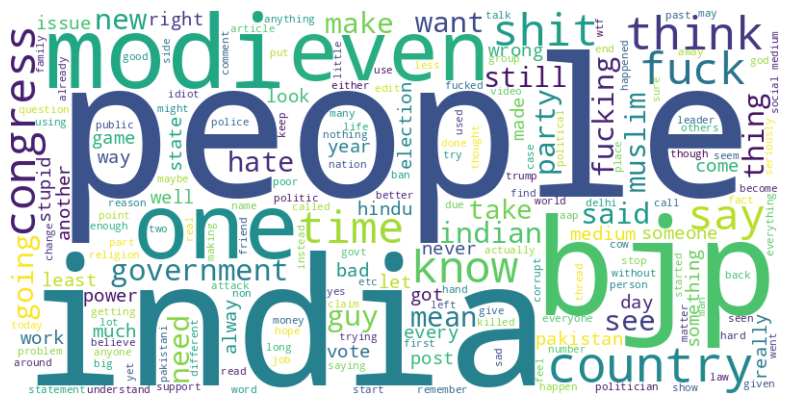

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == -1]['clean_comment'])

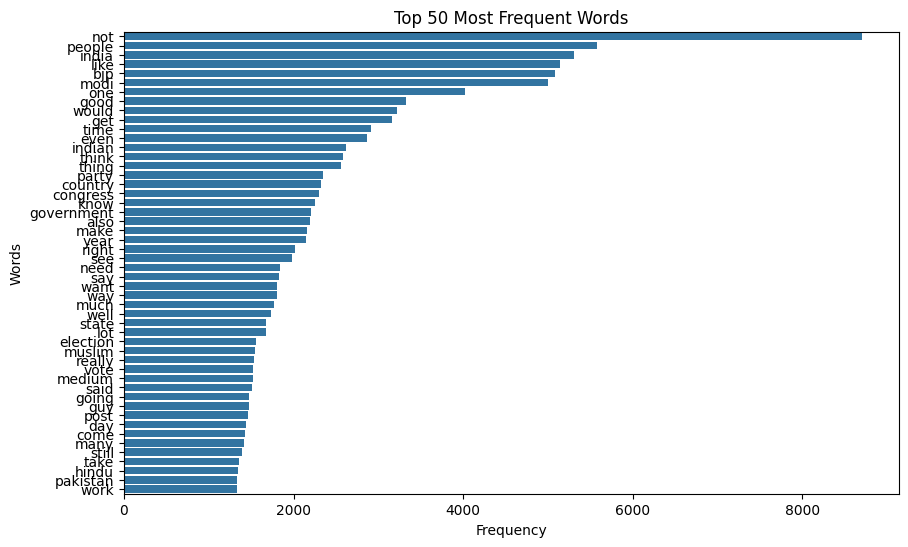

In [ ]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['clean_comment']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(df, n=50)